In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
RND_SEED = 42
TEST_SIZE = 0.2
LR = 0.1
EPOCHS = 5000
PRINT_EVERY = 500
DROP_DURATION = True
CSV_PATH = "bank-full.csv" 

In [9]:
np.random.seed(RND_SEED)

In [10]:
print("Loading data:", CSV_PATH)
df = pd.read_csv(CSV_PATH, sep=';')
print("Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())

Loading data: bank-full.csv
Shape: (45211, 17)

First 5 rows:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [11]:
print("\n--- Basic info ---")
print(df.info())


--- Basic info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
print("\n--- Target distribution (y) ---")
print(df['y'].value_counts())
print("\nProportion 'yes' ->", df['y'].value_counts(normalize=True).to_dict())


--- Target distribution (y) ---
y
no     39922
yes     5289
Name: count, dtype: int64

Proportion 'yes' -> {'no': 0.8830151954170445, 'yes': 0.11698480458295547}


In [14]:
print("\n--- Numeric summary ---")
print(df.describe().T)


--- Numeric summary ---
            count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0  


In [15]:
print("\nMissing values per column:\n", df.isna().sum())


Missing values per column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [16]:
print("\n--- Categorical Columns Statistics (df.describe(include='object')) ---")
print(df.describe(include='object'))


--- Categorical Columns Statistics (df.describe(include='object')) ---
                job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922  


In [17]:
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numeric_present = [c for c in numeric_cols if c in df.columns]

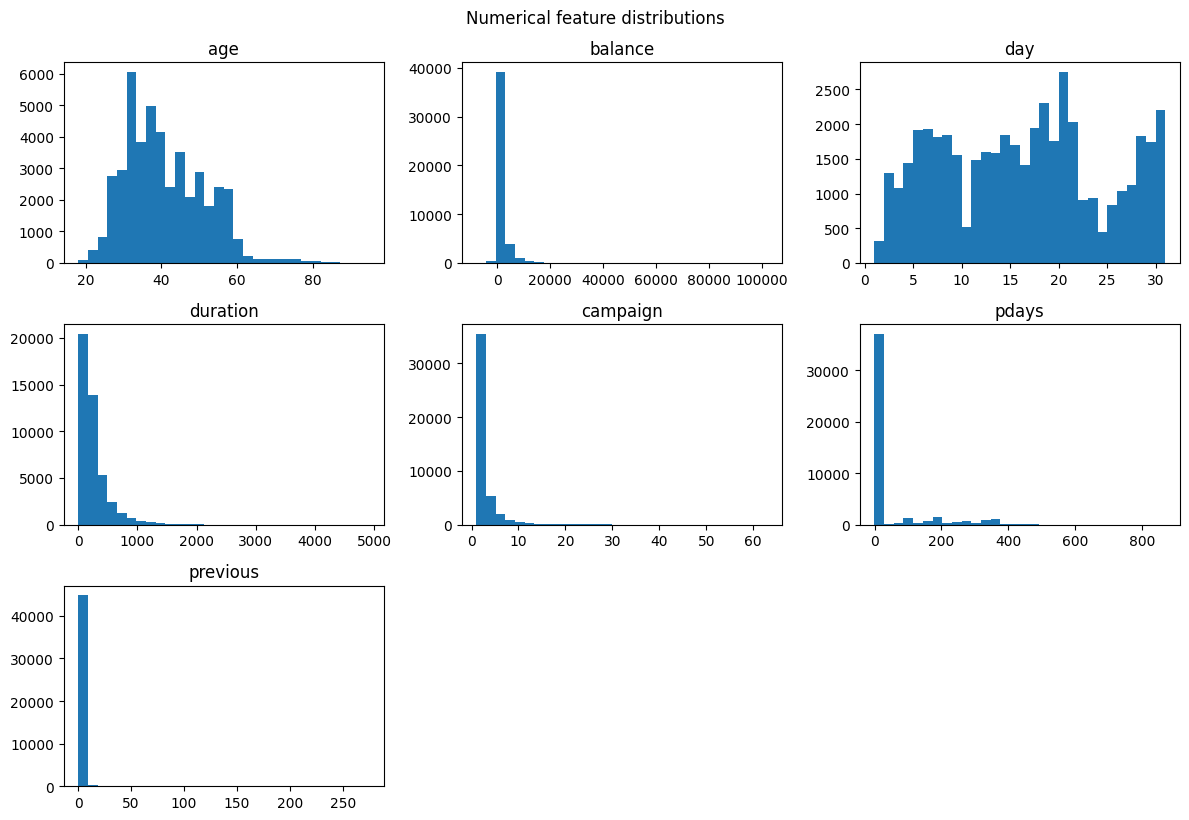

In [18]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_present):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[col], bins=30)
    plt.title(col)
plt.tight_layout()
plt.suptitle("Numerical feature distributions", y=1.02)
plt.show()

<Figure size 800x400 with 0 Axes>

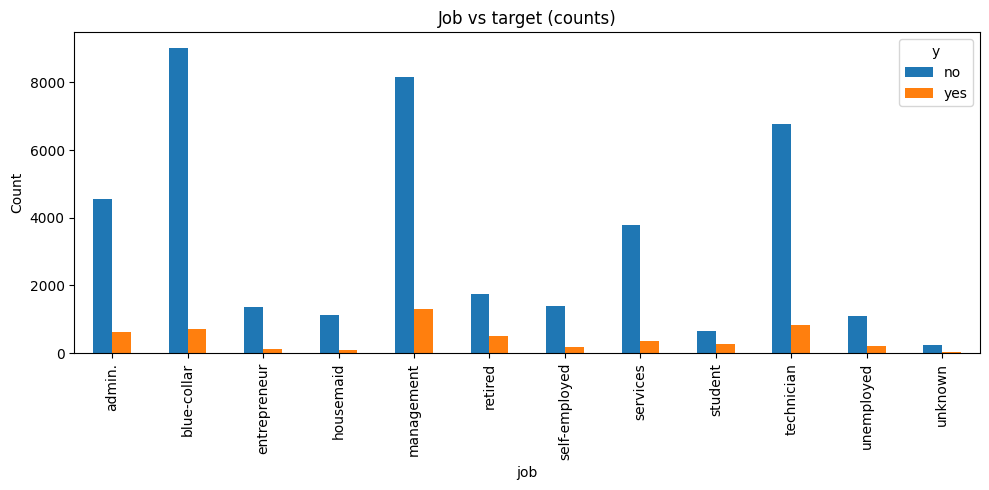

In [19]:
if 'job' in df.columns:
    plt.figure(figsize=(8,4))
    job_counts = df.groupby(['job','y']).size().unstack(fill_value=0)
    job_counts.plot(kind='bar', stacked=False, figsize=(10,5))
    plt.title("Job vs target (counts)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

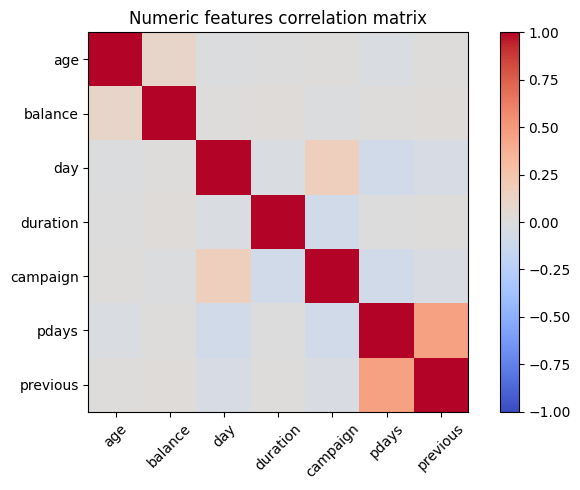

In [20]:
corr = df[numeric_present].corr()
plt.figure(figsize=(7,5))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(numeric_present)), numeric_present, rotation=45)
plt.yticks(range(len(numeric_present)), numeric_present)
plt.title("Numeric features correlation matrix")
plt.tight_layout()
plt.show()

In [21]:
if DROP_DURATION and 'duration' in df.columns:
    print("\nDropping 'duration' feature (it leaks outcome).")
    df = df.drop(columns=['duration'])



Dropping 'duration' feature (it leaks outcome).


In [22]:
y_raw = df['y'].map({'yes':1, 'no':0})   
X_df = df.drop(columns=['y'])

In [23]:
X_df = pd.get_dummies(X_df, drop_first=True)  # drop_first to avoid redundant column
print("\nAfter one-hot encoding, feature shape:", X_df.shape)


After one-hot encoding, feature shape: (45211, 41)


In [24]:
X_all = X_df.values.astype(float)
y_all = y_raw.values.astype(int)

In [25]:
n = len(y_all)
idx = np.random.permutation(n)
n_test = int(TEST_SIZE * n)
test_idx = idx[:n_test]
train_idx = idx[n_test:]


In [26]:
X_train = X_all[train_idx]
y_train = y_all[train_idx]
X_test = X_all[test_idx]
y_test = y_all[test_idx]

In [27]:
print(f"\nTrain size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")



Train size: 36169, Test size: 9042


In [28]:
# Standardize features using training stats
feature_mean = X_train.mean(axis=0)
feature_std = X_train.std(axis=0)
# avoid divide by zero
feature_std[feature_std == 0] = 1.0
X_train_std = (X_train - feature_mean) / feature_std
X_test_std = (X_test - feature_mean) / feature_std

In [29]:
class BinaryLogisticRegression:
    def __init__(self, lr=0.1, epochs=1000, verbose=False):
        self.lr = lr
        self.epochs = epochs
        self.verbose = verbose

    @staticmethod
    def _sigmoid(z):
        # stable sigmoid
        z = np.clip(z, -500, 500)
        return 1.0 / (1.0 + np.exp(-z))

    @staticmethod
    def _bce_loss(y_true, y_prob):
        eps = 1e-12
        y_prob = np.clip(y_prob, eps, 1 - eps)
        return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))

    def fit(self, X, y):
        # X: (n_samples, n_features)
        n_samples, n_features = X.shape
        # initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0.0
        self.loss_history = []

        for epoch in range(1, self.epochs + 1):
            # linear logits
            logits = X.dot(self.w) + self.b
            probs = self._sigmoid(logits)
            # gradient of BCE
            error = probs - y  # shape (n_samples,)
            grad_w = (X.T.dot(error)) / n_samples
            grad_b = np.mean(error)
            # update
            self.w -= self.lr * grad_w
            self.b -= self.lr * grad_b
            # loss
            loss = self._bce_loss(y, probs)
            self.loss_history.append(loss)
            if self.verbose and (epoch % PRINT_EVERY == 0 or epoch == 1 or epoch == self.epochs):
                print(f"Epoch {epoch}/{self.epochs} - loss: {loss:.6f}")

    def predict_proba(self, X):
        logits = X.dot(self.w) + self.b
        return self._sigmoid(logits)

    def predict(self, X, threshold=0.5):
        probs = self.predict_proba(X)
        return (probs >= threshold).astype(int)


In [30]:
print("\nTraining logistic regression (from scratch)...")
model = BinaryLogisticRegression(lr=LR, epochs=EPOCHS, verbose=True)
model.fit(X_train_std, y_train)
print("Training completed.")


Training logistic regression (from scratch)...
Epoch 1/5000 - loss: 0.693147
Epoch 500/5000 - loss: 0.299817
Epoch 1000/5000 - loss: 0.298784
Epoch 1500/5000 - loss: 0.298632
Epoch 2000/5000 - loss: 0.298598
Epoch 2500/5000 - loss: 0.298588
Epoch 3000/5000 - loss: 0.298585
Epoch 3500/5000 - loss: 0.298584
Epoch 4000/5000 - loss: 0.298583
Epoch 4500/5000 - loss: 0.298583
Epoch 5000/5000 - loss: 0.298583
Training completed.


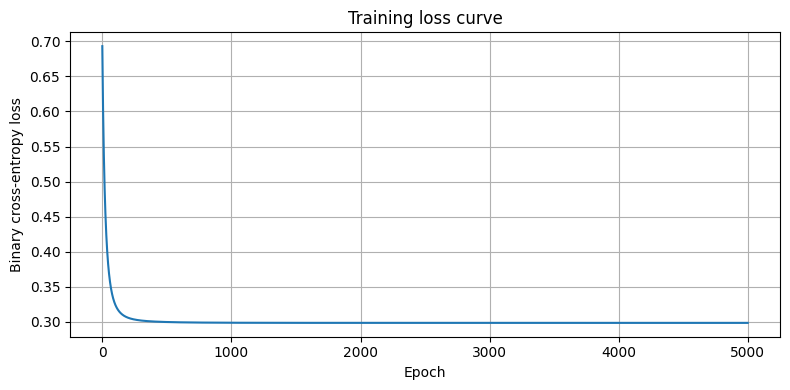

In [31]:
# Plot training loss curve
plt.figure(figsize=(8,4))
plt.plot(model.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Binary cross-entropy loss")
plt.title("Training loss curve")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
y_prob_test = model.predict_proba(X_test_std)
y_pred_test = (y_prob_test >= 0.5).astype(int)

In [33]:
def confusion_matrix_binary(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

In [ ]:
def roc_auc_score(y_true, y_score):
    # y_true: binary labels, y_score: predicted probability for positive class
    desc = np.argsort(-y_score)
    y_score_sorted = y_score[desc]
    y_true_sorted = y_true[desc]
    tp = 0.0
    fp = 0.0
    tps = []
    fps = []
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    for yt in y_true_sorted:
        if yt == 1:
            tp += 1
        else:
            fp += 1
        tps.append(tp)
        fps.append(fp)
    tpr = np.array(tps) / P if P > 0 else np.zeros_like(tps)
    fpr = np.array(fps) / N if N > 0 else np.zeros_like(fps)
    x = np.concatenate(([0.], fpr, [1.]))
    y = np.concatenate(([0.], tpr, [1.]))
    auc = np.trapz(y, x)
    return auc

In [37]:
def compute_metrics(y_true, y_pred, y_prob=None):
    tp, tn, fp, fn = confusion_matrix_binary(y_true, y_pred)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    metrics = {
        'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1': f1
    }
    if y_prob is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_prob)
    return metrics


--- Test set evaluation metrics ---
tp: 194
tn: 7854
fp: 97
fn: 897
accuracy: 0.8900685689006856
precision: 0.6666666666666666
recall: 0.1778185151237397
specificity: 0.9878002766947553
f1: 0.28075253256150506
roc_auc: 0.7569775737990057

Confusion matrix (test):
 TP=194, FP=97
 FN=897, TN=7854


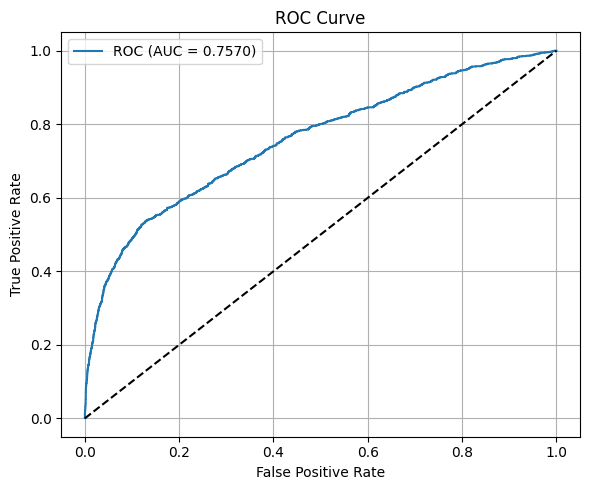

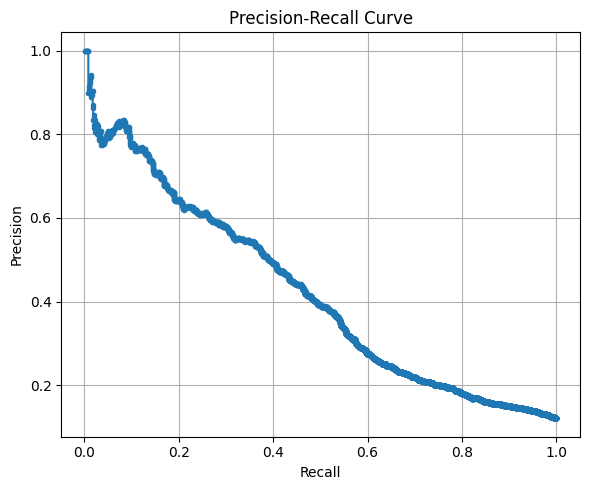

In [38]:
metrics = compute_metrics(y_test, y_pred_test, y_prob_test)
print("\n--- Test set evaluation metrics ---")
for k,v in metrics.items():
    print(f"{k}: {v}")

tp, tn, fp, fn = metrics['tp'], metrics['tn'], metrics['fp'], metrics['fn']
print(f"\nConfusion matrix (test):\n TP={tp}, FP={fp}\n FN={fn}, TN={tn}")

def compute_roc_curve(y_true, y_score):
    thresholds = np.unique(np.sort(y_score))[::-1]
    tprs = []
    fprs = []
    for t in thresholds:
        y_pred_t = (y_score >= t).astype(int)
        tp, tn, fp, fn = confusion_matrix_binary(y_true, y_pred_t)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
        tprs.append(tpr)
        fprs.append(fpr)
    return np.array(fprs), np.array(tprs), thresholds

def compute_precision_recall_curve(y_true, y_score):
    thresholds = np.unique(np.sort(y_score))[::-1]
    precisions = []
    recalls = []
    for t in thresholds:
        y_pred_t = (y_score >= t).astype(int)
        tp, tn, fp, fn = confusion_matrix_binary(y_true, y_pred_t)
        prec = tp / (tp + fp) if (tp + fp) > 0 else 1.0
        rec = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        precisions.append(prec)
        recalls.append(rec)
    return np.array(precisions), np.array(recalls), thresholds

fpr, tpr, thr = compute_roc_curve(y_test, y_prob_test)
auc_val = roc_auc_score(y_test, y_prob_test)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_val:.4f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

precisions, recalls, pr_thr = compute_precision_recall_curve(y_test, y_prob_test)
plt.figure(figsize=(6,5))
plt.plot(recalls, precisions, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
print("\nMetrics at different thresholds:")
for t in [0.9, 0.75, 0.5, 0.25, 0.1]:
    y_pred_t = (y_prob_test >= t).astype(int)
    m = compute_metrics(y_test, y_pred_t)
    print(f"Threshold {t:.2f}: acc={m['accuracy']:.4f}, prec={m['precision']:.4f}, recall={m['recall']:.4f}, f1={m['f1']:.4f}")



Metrics at different thresholds:
Threshold 0.90: acc=0.8800, prec=1.0000, recall=0.0055, f1=0.0109
Threshold 0.75: acc=0.8852, prec=0.8118, recall=0.0632, f1=0.1173
Threshold 0.50: acc=0.8901, prec=0.6667, recall=0.1778, f1=0.2808
Threshold 0.25: acc=0.8842, prec=0.5288, recall=0.3703, f1=0.4356
Threshold 0.10: acc=0.6653, prec=0.2198, recall=0.6957, f1=0.3341


In [42]:
print("The logistic regression model from scratch achieves an AUC of ~0.757, showing moderate discriminative power.")
print("The ROC and precision-recall curves confirm that the model is reliable for baseline prediction, but threshold tuning and handling data imbalance could further enhance recall and overall campaign success.")

The logistic regression model from scratch achieves an AUC of ~0.757, showing moderate discriminative power.
The ROC and precision-recall curves confirm that the model is reliable for baseline prediction, but threshold tuning and handling data imbalance could further enhance recall and overall campaign success.


In [43]:
print("""Overall Model Behavior:

The ROC curve shows an AUC of ~0.757, indicating that the logistic regression model has a moderate ability to distinguish between clients who subscribe (yes) and those who do not (no).

This is significantly better than random guessing (AUC = 0.5) but not perfect, suggesting that while the model captures key patterns in the data, there’s room for improvement (e.g., through feature engineering or regularization).

Precision–Recall Analysis:

The precision-recall curve shows that precision decreases as recall increases, which is typical for imbalanced datasets.

Initially, when the model is very strict (high threshold), precision is high but recall is low — meaning the model predicts fewer “yes” cases but with higher confidence.

As the threshold lowers, recall increases (the model catches more actual “yes” cases), but precision drops — indicating more false positives.

This trade-off allows us to tune the threshold depending on business goals:

Use high recall if the bank wants to target as many potential subscribers as possible.

Use high precision if the bank wants to minimize wasted calls.""")

Overall Model Behavior:

The ROC curve shows an AUC of ~0.757, indicating that the logistic regression model has a moderate ability to distinguish between clients who subscribe (yes) and those who do not (no).

This is significantly better than random guessing (AUC = 0.5) but not perfect, suggesting that while the model captures key patterns in the data, there’s room for improvement (e.g., through feature engineering or regularization).

Precision–Recall Analysis:

The precision-recall curve shows that precision decreases as recall increases, which is typical for imbalanced datasets.

Initially, when the model is very strict (high threshold), precision is high but recall is low — meaning the model predicts fewer “yes” cases but with higher confidence.

As the threshold lowers, recall increases (the model catches more actual “yes” cases), but precision drops — indicating more false positives.

This trade-off allows us to tune the threshold depending on business goals:

Use high recall i